In [44]:
import math

x = [1.55818308e-02, 1.51294795e+00, 4.39798614e+00, 1.63553529e+00, 8.09641650e-02, 2.03719639e-01, 1.20403543e-01, 4.07587229e-03]
i0 = x[0]
ke = x[1]
r = x[2]
klin = x[3]
linearTransition = x[4]
staticFriction = x[5]
coulombFriction = x[6]
addedInertia = x[7]

kvis = (ke - klin)*ke/r
coulombContribution = (1/(1 - math.exp(-1)))*(kvis * linearTransition - math.exp(-1)*staticFriction + coulombFriction)


## Comparison with my model
k_tau = ke 
R = r
q_dot_s = linearTransition
tau_c = coulombContribution
tau_s = staticFriction
c_v = -kvis
motor_inertia = i0
parameters = [k_tau, R, q_dot_s, tau_c, tau_s, c_v, motor_inertia]
parameters

[1.51294795,
 4.39798614,
 0.080964165,
 0.0665140867408596,
 0.203719639,
 0.04217117990939209,
 0.0155818308]

In [59]:
# 46 [rev/min] (at 11.1 [V])
# 50 [rev/min] (at 12.0 [V])
# 62 [rev/min] (at 14.8 [V])

rpm_to_rads = 2*np.pi/60
# rpm_to_rads = 1
print( 11.1 / (46 * rpm_to_rads), 12/ (50 * rpm_to_rads), 14.8/(62 * rpm_to_rads))

# 27 [rev/min] (at 11.1 [V])
# 30 [rev/min] (at 12.0 [V])
# 37 [rev/min] (at 14.8 [V])
11.1/(27 * rpm_to_rads), 12/(30 * rpm_to_rads ), 14.8/(37 * rpm_to_rads)

2.3042867847652673 2.2918311805232934 2.279509507509727


(3.925821929600085, 3.819718634205488, 3.8197186342054885)

In [91]:
tau_1, I_1 = 0.06, 0.084
tau_2, I_2 = 2.82, 1.12

# Calculating the slope (m)
m = (tau_2 - tau_1) / (I_2 - I_1)
m

2.6640926640926637

In [24]:
# Pour estimer en premier lieu k_t, on prend les data disponibles dans la datasheet

# Stall torque
# 3.1 [N.m] (at 11.1 [V], 1.2 [A])
# 3.4 [N.m] (at 12.0 [V], 1.3 [A])
# 4.2 [N.m] (at 14.8 [V], 1.5 [A])

print(3.1 / 1.2, 3.4 / 1.3, 4.2 / 1.5)

# Performance graph
tau_1, I_1 = 0.06, 0.084
tau_2, I_2 = 2.82, 1.12

# Calculating the slope (m)
m = (tau_2 - tau_1) / (I_2 - I_1)
print(m)

# On moyenne le tout
(3.1 / 1.2 + 3.4 / 1.3 + 4.2 / 1.5 + m) / 4 # k_t = 2.6657

2.5833333333333335 2.6153846153846154 2.8000000000000003
2.6640926640926637


2.6657026532026533

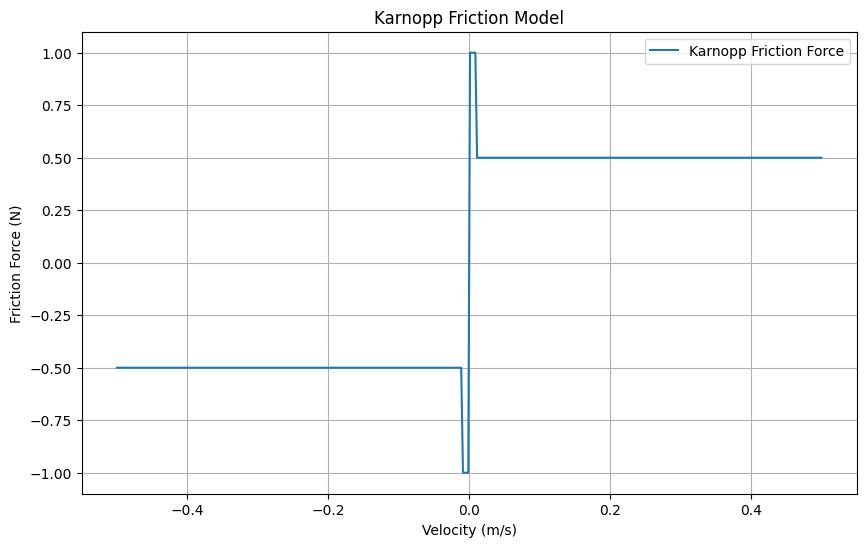

In [124]:
import numpy as np
import matplotlib.pyplot as plt

def karnopp_friction_model(v, static_friction_force, coulomb_friction_force, static_friction_velocity_threshold):
    """
    Implements the Karnopp friction model.
    
    Parameters:
    - v: Array of velocities
    - static_friction_force: The static friction force threshold
    - coulomb_friction_force: The constant Coulomb friction force
    - static_friction_velocity_threshold: Velocity threshold to switch from static to dynamic friction
    
    Returns:
    - Array of friction forces corresponding to the input velocities
    """
    friction_force = np.zeros_like(v)
    for i, velocity in enumerate(v):
        if abs(velocity) < static_friction_velocity_threshold:
            # Static friction applies
            friction_force[i] = np.sign(velocity) * static_friction_force
        else:
            # Coulomb (dynamic) friction applies
            friction_force[i] = np.sign(velocity) * coulomb_friction_force
    return friction_force

# Parameters
static_friction_force = 1.0  # N
coulomb_friction_force = 0.5  # N
static_friction_velocity_threshold = 0.01  # m/s, velocity threshold

# Generate velocities
velocities = np.linspace(-0.5, 0.5, 400)

# Compute friction forces using Karnopp model
friction_forces = karnopp_friction_model(velocities, static_friction_force, coulomb_friction_force, static_friction_velocity_threshold)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(velocities, friction_forces, label='Karnopp Friction Force')
# plt.axhline(y=static_friction_force, color='r', linestyle='--', label='Static Friction Force')
# plt.axhline(y=-static_friction_force, color='r', linestyle='--')
# plt.axhline(y=coulomb_friction_force, color='g', linestyle='--', label='Coulomb Friction Force')
# plt.axhline(y=-coulomb_friction_force, color='g', linestyle='--')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Friction Force (N)')
plt.title('Karnopp Friction Model')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Given values
mass_per_unit_length = 0.4  # kg/m
length_of_piece_m = 0.405  # m, converted from 40.5 cm

# Calculate the total mass
total_mass = mass_per_unit_length * length_of_piece_m

# Calculate the mass moment of inertia for the piece rotating about its center
I_m = (1/12) * total_mass * length_of_piece_m**2

total_mass, I_m

(0.16200000000000003, 0.002214337500000001)

In [12]:
# Conversion factor from gmm^2 to kgm^2
conversion_factor = 10**-9

# Given moment of inertia for the second piece in gmm^2
moment_of_inertia_second_piece_gmm2 = 27776.8208

# Convert the moment of inertia of the second piece to kgm^2
moment_of_inertia_second_piece_kgm2 = moment_of_inertia_second_piece_gmm2 * conversion_factor

# Calculate the total inertia by adding both moments of inertia
total_inertia = I_m + moment_of_inertia_second_piece_kgm2

moment_of_inertia_second_piece_kgm2, total_inertia


(2.7776820800000002e-05, 0.002242114320800001)

In [1]:
11.1/1.2, 12.0/1.3, 14.8/1.5
# 11.1/2.3, 12.0/1.3, 14.8/1.5

(9.25, 9.23076923076923, 9.866666666666667)

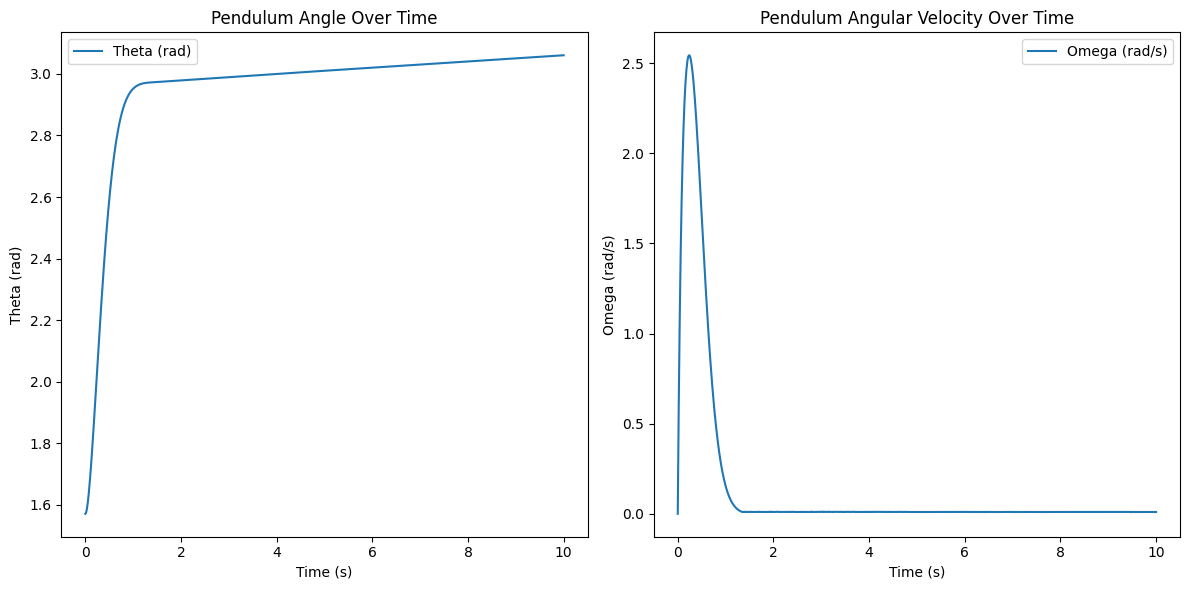

In [20]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
l = 0.247679  # Length of the pendulum (m)
m = 0.342  # Mass of the pendulum bob (kg)
b_viscous = 0.24  # Viscous damping coefficient
tau_s = 0.203719639  # Stiction (static friction) torque (Nm)
tau_c = 0.14  # Coulomb (dynamic friction) torque (Nm)

# Pendulum dynamics
def pendulum_dynamics(t, y):
    theta, omega = y
    # Gravitational torque
    tau_g = m * g * l * np.sin(theta)
    
    # Determine if in stiction zone (static friction)
    if np.isclose(omega, 0, atol=1e-2) and np.abs(tau_g) < tau_s:
        tau_friction = 0
    else:
        # Apply Coulomb (dynamic) friction and viscous damping
        tau_friction = np.sign(omega) * tau_c + b_viscous * omega
    
    # Net torque
    tau_net = tau_g - tau_friction
    
    # Equations of motion
    dtheta_dt = omega
    domega_dt = tau_net / (m * l**2)
    
    return [dtheta_dt, domega_dt]

# Initial conditions: theta = pi/2 (or other values for testing), omega = 0
theta_0 = np.pi / 2
omega_0 = 0.0
y0 = [theta_0, omega_0]

# Time span for the simulation
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Solve the ODE
sol = solve_ivp(pendulum_dynamics, t_span, y0, t_eval=t_eval, method='RK45')
# sol = solve_ivp(pendulum_dynamics, t_span, y0, method='Radau', rtol=1e-6, atol=1e-9, t_eval=t_eval)
# sol = solve_ivp(pendulum_dynamics, t_span, y0, method='BDF', rtol=1e-6, atol=1e-9, t_eval=t_eval)


# Plotting the results
plt.figure(figsize=(12, 6))

# Theta (angle) over time
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label='Theta (rad)')
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Pendulum Angle Over Time')
plt.legend()

# Omega (angular velocity) over time
plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1], label='Omega (rad/s)')
plt.xlabel('Time (s)')
plt.ylabel('Omega (rad/s)')
plt.title('Pendulum Angular Velocity Over Time')
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
torque = (1020e-3 * 9.81 * 7e-2)
Ra = 9.3756
ia = (200 * 0.113 * 12 / 100) / Ra

In [2]:
kt = torque / ia
kt

2.4214561247787616

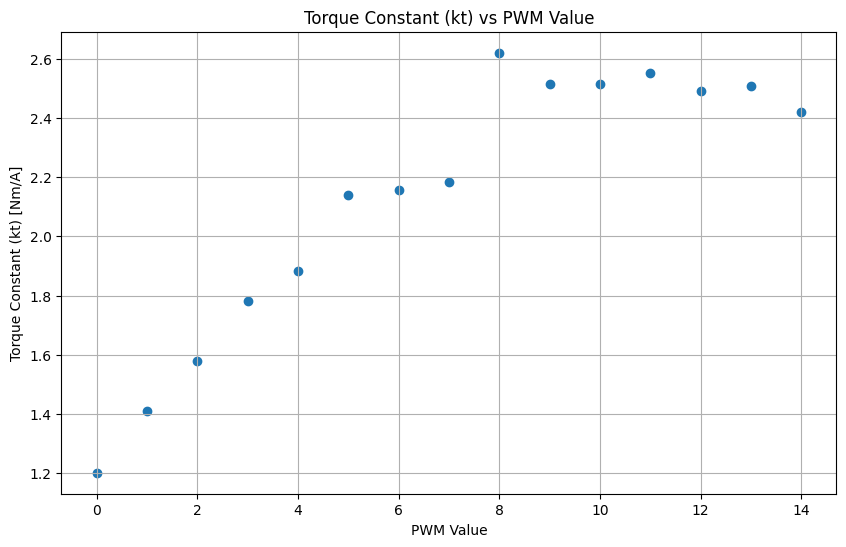

2.1304277193385626


,PWM_value,Average_Measure_g,ia,Torque,kt
0,8,20.233333,0.011570,0.013894,1.200836
1,9,26.714286,0.013017,0.018345,1.409313
2,10,33.250000,0.014463,0.022833,1.578694
3,11,41.233333,0.015909,0.028315,1.779763
4,12,47.557143,0.017356,0.032657,1.881659
5,15,67.600000,0.021695,0.046421,2.139744
6,20,90.800000,0.028926,0.062352,2.155571
7,25,115.000000,0.036158,0.078971,2.184058
8,-25,138.000000,-0.036158,0.094765,2.620870
9,-40,212.000000,-0.057852,0.145580,2.516415


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Provided data
data = {
    "PWM_value": [8, 9, 10, 11, 12, 15, 20, 25, -25, -40, -60, -80, -100, -150, -200],
    "Measure_g": [
        [19.6, 18.8, 19.1, 22.2, 22.3, 19.4],
        [28.2, 28.0, 27.4, 26.4, 25.1, 27.0, 24.9],
        [33.2, 32.9, 32.1, 33.7, 33.9, 33.7],
        [40.2, 40.5, 41.1, 43.5, 41.1, 41.0],
        [48.7, 46.2, 50.4, 46.3, 46.2, 47.6, 47.5],
        [67.6],
        [90.8],
        [115.0],
        [138],
        [212],
        [318],
        [430],
        [525],
        [792],
        [1020]
    ]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Calculate the average measured value for each PWM value
df['Average_Measure_g'] = df['Measure_g'].apply(np.mean)

# Given constants
Ra = 9.3756  # Ohm
lever = 7e-2  # meters

# Calculate current ia for each PWM value
df['ia'] = (df['PWM_value'] * 0.113 * 12 / 100) / Ra

# Calculate torque for each measured value
df['Torque'] = df['Average_Measure_g'] * 9.81 * lever * 1e-3

# Calculate torque constant kt for each measurement
df['kt'] = abs(df['Torque'] / df['ia'])

# Plot the results
plt.figure(figsize=(10, 6))
# plt.plot(df['PWM_value'], df['kt'], marker='o', linestyle='-', color='b')
plt.scatter(df.index, abs(df['kt']))
plt.title('Torque Constant (kt) vs PWM Value')
plt.xlabel('PWM Value')
plt.ylabel('Torque Constant (kt) [Nm/A]')
plt.grid(True)
plt.show()
print(df['kt'].mean())
df[['PWM_value', 'Average_Measure_g', 'ia', 'Torque', 'kt']]


In [22]:
(0.0005 / 1000) * 1055 * 30000

15.825

In [15]:
import numpy as np

# Constants
m1, m2 = 1.0, 1.0  # masses of the two pendulum arms
l1, l2 = 1.0, 1.0  # lengths of the pendulum arms
g = 9.81  # acceleration due to gravity

def compute_mass_matrix(q):
    """Compute the mass matrix for the double pendulum."""
    M = np.zeros((2, 2))
    M[0, 0] = m1 * l1**2 + m2 * (l1**2 + l2**2 + 2 * l1 * l2 * np.cos(q[1]))
    M[0, 1] = m2 * (l2**2 + l1 * l2 * np.cos(q[1]))
    M[1, 0] = M[0, 1]
    M[1, 1] = m2 * l2**2
    return M

def compute_christoffel_symbols(q):
    """Compute the Christoffel symbols matrix for the double pendulum."""
    C = np.zeros((2, 2))
    # Derivative terms for Christoffel symbols
    d11_2 = -m2 * l1 * l2 * np.sin(q[1])
    d12_2 = -m2 * l1 * l2 * np.sin(q[1])
    d21_1 = m2 * l1 * l2 * np.sin(q[1])
    
    C[0, 0] = d11_2 * q[1]
    C[0, 1] = d12_2 * q[1]
    C[1, 0] = d21_1 * q[0]
    C[1, 1] = 0
    return C

def compute_gravity_vector(q):
    """Compute the gravity vector for the double pendulum."""
    G = np.zeros(2)
    G[0] = (m1 + m2) * g * l1 * np.sin(q[0]) + m2 * g * l2 * np.sin(q[0] + q[1])
    G[1] = m2 * g * l2 * np.sin(q[0] + q[1])
    return G

def dynamics_bias(q, q_dot):
    """Compute the dynamics bias for the double pendulum."""
    M = compute_mass_matrix(q)
    C = compute_christoffel_symbols(q)
    G = compute_gravity_vector(q)
    bias = np.dot(C, q_dot) + G
    return bias

# Example usage:
q = np.array([np.pi/2, 0])  # example angles (in radians)
q_dot = np.array([0, 0])  # example angular velocities (in radians/sec)

bias = dynamics_bias(q, q_dot)
print("Dynamics Bias:", bias)


Dynamics Bias: [29.43  9.81]
